In [129]:
import glob
import os
import pandas as pd
import numpy as np

files_path = '/Users/annadugoul/Documents/SCData/SC5118'
read_files = glob.glob(os.path.join(files_path, "*.dat"))

np_array_values = []
for files in read_files:
    DailyP5118_data = pd.read_fwf(files, header=0)
    np_array_values.append(DailyP5118_data)
    DailyP5118_data.columns = ['YYYY', 'MM', 'DD', 'Pinmm']
    print(files)

/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56198.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56167.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56173.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56371.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56172.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56199.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57318.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57324.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56038.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57326.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56158.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57508.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56164.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56399.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56373.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56

In [130]:
np_array_values

[       YYYY  MM  DD  Pinmm
 0      1951   1   1 -999.0
 1      1951   1   2 -999.0
 2      1951   1   3 -999.0
 3      1951   1   4 -999.0
 4      1951   1   5 -999.0
 ...     ...  ..  ..    ...
 24832  2018  12  27    3.7
 24833  2018  12  28    7.0
 24834  2018  12  29 -999.0
 24835  2018  12  30    0.0
 24836  2018  12  31    0.4
 
 [24837 rows x 4 columns],
        YYYY  MM  DD  Pinmm
 0      1951   1   1 -999.0
 1      1951   1   2 -999.0
 2      1951   1   3 -999.0
 3      1951   1   4 -999.0
 4      1951   1   5 -999.0
 ...     ...  ..  ..    ...
 24832  2018  12  27    0.0
 24833  2018  12  28    0.0
 24834  2018  12  29    0.0
 24835  2018  12  30    0.0
 24836  2018  12  31    0.0
 
 [24837 rows x 4 columns],
        YYYY  MM  DD  Pinmm
 0      1951   1   1 -999.0
 1      1951   1   2 -999.0
 2      1951   1   3 -999.0
 3      1951   1   4 -999.0
 4      1951   1   5 -999.0
 ...     ...  ..  ..    ...
 24832  2018  12  27    0.0
 24833  2018  12  28    0.0
 24834  2018  12  

In [131]:
merge_values = np.vstack(np_array_values)
DailyP5118_data = pd.DataFrame(merge_values,
                columns=('YYYY', 'MM', 'DD', 'Pinmm'))
DailyP5118_data

,YYYY,MM,DD,Pinmm
0,1951.0,1.0,1.0,-999.0
1,1951.0,1.0,2.0,-999.0
2,1951.0,1.0,3.0,-999.0
3,1951.0,1.0,4.0,-999.0
4,1951.0,1.0,5.0,-999.0
...,...,...,...,...
3874567,2018.0,12.0,27.0,0.2
3874568,2018.0,12.0,28.0,0.3
3874569,2018.0,12.0,29.0,1.9
3874570,2018.0,12.0,30.0,0.0


In [132]:
import pandas as pd
import os

path = r'/Users/annadugoul/Documents/SCData/SC5118'
files = os.listdir(path)

DailyP5118_data = pd.DataFrame()

for file in files:
    df_station = pd.read_fwf(path + '//' + file)
    df_station['Station'] = file
    DailyP5118_data = DailyP5118_data.append(df_station)
DailyP5118_data

,YYYY,MM,DD,Pinmm,Station
0,1951,1,1,-999.0,DailyP5118_56198.dat
1,1951,1,2,-999.0,DailyP5118_56198.dat
2,1951,1,3,-999.0,DailyP5118_56198.dat
3,1951,1,4,-999.0,DailyP5118_56198.dat
4,1951,1,5,-999.0,DailyP5118_56198.dat
...,...,...,...,...,...
24832,2018,12,27,0.2,DailyP5118_57328.dat
24833,2018,12,28,0.3,DailyP5118_57328.dat
24834,2018,12,29,1.9,DailyP5118_57328.dat
24835,2018,12,30,0.0,DailyP5118_57328.dat


In [133]:
DailyP5118_data['Date'] = DailyP5118_data['DD'].map(str) + '/' + DailyP5118_data['MM'].map(str) + '/' + DailyP5118_data['YYYY'].map(str)
DailyP5118_data = pd.DataFrame(DailyP5118_data)
DailyP5118_data

cols_to_check = ['Station']
DailyP5118_data[cols_to_check] = DailyP5118_data[cols_to_check].replace({'.dat':''}, regex=True)
DailyP5118_data[cols_to_check] = DailyP5118_data[cols_to_check].replace({'DailyP5118_':''}, regex=True)
DailyP5118_data = pd.DataFrame(DailyP5118_data)
DailyP5118_data

,YYYY,MM,DD,Pinmm,Station,Date
0,1951,1,1,-999.0,56198,1/1/1951
1,1951,1,2,-999.0,56198,2/1/1951
2,1951,1,3,-999.0,56198,3/1/1951
3,1951,1,4,-999.0,56198,4/1/1951
4,1951,1,5,-999.0,56198,5/1/1951
...,...,...,...,...,...,...
24832,2018,12,27,0.2,57328,27/12/2018
24833,2018,12,28,0.3,57328,28/12/2018
24834,2018,12,29,1.9,57328,29/12/2018
24835,2018,12,30,0.0,57328,30/12/2018


In [134]:
the_data = DailyP5118_data.drop(DailyP5118_data.index[0:17897])
dataframe = pd.DataFrame(the_data)

In [135]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe = dataframe.astype({"Station": np.int64})

In [136]:
stations_coord = pd.read_csv('/Users/annadugoul/Documents/SCData/CSV/Sta_SiChuan.csv')
dataframe = pd.merge(dataframe, stations_coord, on="Station")
dataframe

,YYYY,MM,DD,Pinmm,Station,Date,Longitude,Latitude,Elevation
0,2000,1,1,0.0,56198,2000-01-01,104.5,31.32,525.7
1,2000,1,2,0.0,56198,2000-02-01,104.5,31.32,525.7
2,2000,1,3,0.0,56198,2000-03-01,104.5,31.32,525.7
3,2000,1,4,0.0,56198,2000-04-01,104.5,31.32,525.7
4,2000,1,5,0.0,56198,2000-05-01,104.5,31.32,525.7
...,...,...,...,...,...,...,...,...,...
1082635,2018,12,27,0.2,57328,2018-12-27,107.5,31.20,344.9
1082636,2018,12,28,0.3,57328,2018-12-28,107.5,31.20,344.9
1082637,2018,12,29,1.9,57328,2018-12-29,107.5,31.20,344.9
1082638,2018,12,30,0.0,57328,2018-12-30,107.5,31.20,344.9


In [137]:
dataframe.columns = ['YYYY', 'MM', 'DD', 'Pinmm', 'Station', 'Date', 'Longitude', 'Latitude', 'Elevation']
dataframe

,YYYY,MM,DD,Pinmm,Station,Date,Longitude,Latitude,Elevation
0,2000,1,1,0.0,56198,2000-01-01,104.5,31.32,525.7
1,2000,1,2,0.0,56198,2000-02-01,104.5,31.32,525.7
2,2000,1,3,0.0,56198,2000-03-01,104.5,31.32,525.7
3,2000,1,4,0.0,56198,2000-04-01,104.5,31.32,525.7
4,2000,1,5,0.0,56198,2000-05-01,104.5,31.32,525.7
...,...,...,...,...,...,...,...,...,...
1082635,2018,12,27,0.2,57328,2018-12-27,107.5,31.20,344.9
1082636,2018,12,28,0.3,57328,2018-12-28,107.5,31.20,344.9
1082637,2018,12,29,1.9,57328,2018-12-29,107.5,31.20,344.9
1082638,2018,12,30,0.0,57328,2018-12-30,107.5,31.20,344.9


/Users/annadugoul/opt/anaconda3/envs/Env/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


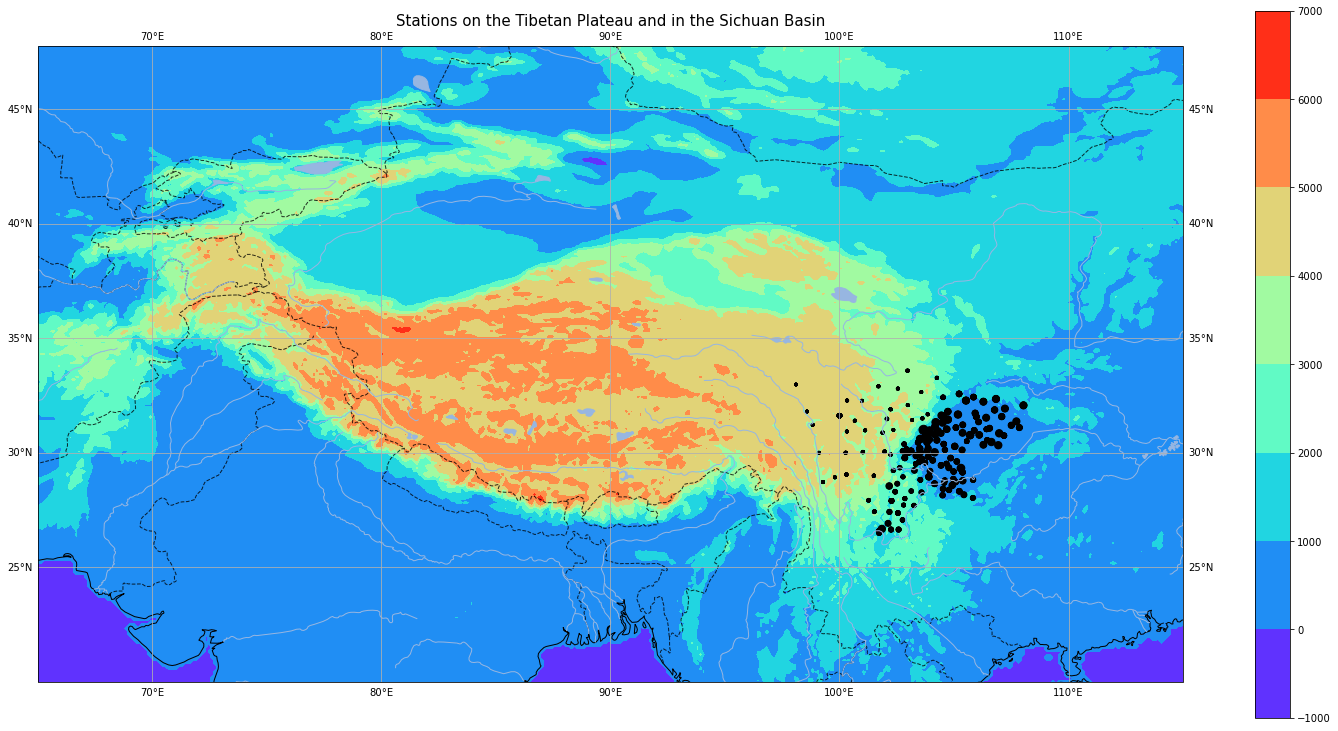

In [138]:
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cf
import cartopy.crs as ccrs

data = Dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')

lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
elevation = data.variables['elevation'][:]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([65,115,20,45])

plt.contourf(lon, lat, elevation, cmap = "rainbow")
plt.title('Stations on the Tibetan Plateau and in the Sichuan Basin', fontsize=15)
plt.tight_layout(pad=-50)
plt.colorbar(shrink=0.55)

ax.coastlines()
ax.add_feature(cf.BORDERS, alpha=0.8, linestyle='--')
ax.add_feature(cf.RIVERS)
ax.add_feature(cf.LAKES)
ax.gridlines(draw_labels=True)

ax.scatter(dataframe.Longitude,dataframe.Latitude, transform=ccrs.PlateCarree(), s=(dataframe.Pinmm/5), color= 'black')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [139]:
H = dataframe.loc[((dataframe['Date'] == '21/7/2008') & (dataframe['Pinmm'] >= 6.26))]
H

,YYYY,MM,DD,Pinmm,Station,Date,Longitude,Latitude,Elevation
3124,2008,7,21,90.8,56198,2008-07-21,104.50,31.32,525.7
37824,2008,7,21,136.8,56199,2008-07-21,104.68,31.03,423.5
44764,2008,7,21,72.5,57318,2008-07-21,106.55,31.07,338.5
51704,2008,7,21,19.8,57324,2008-07-21,107.08,31.58,364.2
72524,2008,7,21,10.1,56158,2008-07-21,100.67,31.40,3250.0
...,...,...,...,...,...,...,...,...,...
1037184,2008,7,21,78.1,56382,2008-07-21,103.60,29.73,407.1
1044124,2008,7,21,10.2,56396,2008-07-21,104.77,29.35,352.6
1051064,2008,7,21,26.4,56383,2008-07-21,103.87,29.83,455.2
1058004,2008,7,21,129.9,56195,2008-07-21,104.73,31.80,543.1


In [142]:
H.dtypes

YYYY                  int64
MM                    int64
DD                    int64
Pinmm               float64
Station               int64
Date         datetime64[ns]
Longitude           float64
Latitude            float64
Elevation           float64
dtype: object

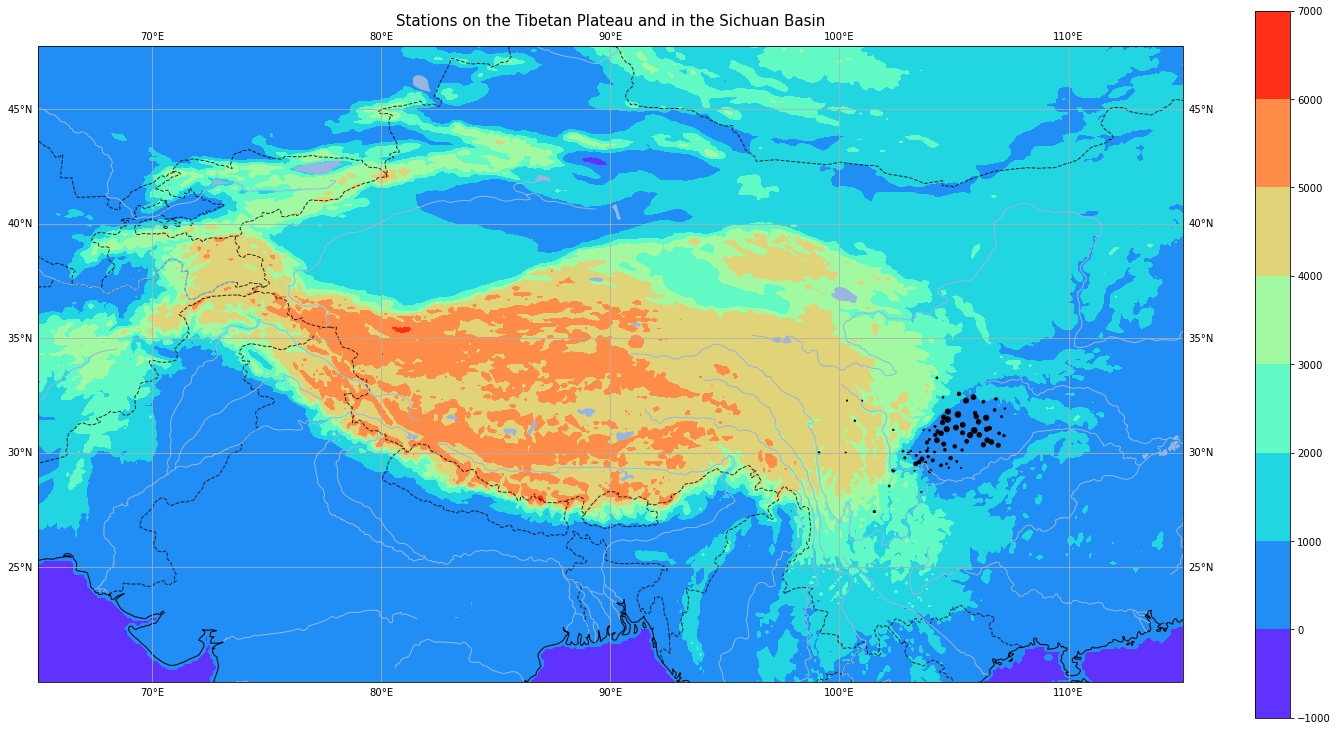

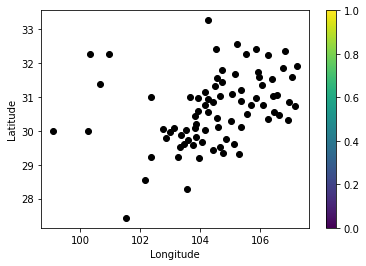

In [144]:
#do not touch
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cf
import cartopy.crs as ccrs

data = Dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')

lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
elevation = data.variables['elevation'][:]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([65,115,20,45])

plt.contourf(lon, lat, elevation, cmap = "rainbow")
plt.title('Stations on the Tibetan Plateau and in the Sichuan Basin', fontsize=15)
plt.tight_layout(pad=-50)
plt.colorbar(shrink=0.55)

ax.coastlines()
ax.add_feature(cf.BORDERS, alpha=0.8, linestyle='--')
ax.add_feature(cf.RIVERS)
ax.add_feature(cf.LAKES)
ax.gridlines(draw_labels=True)

ax.scatter(H.Longitude,H.Latitude, transform=ccrs.PlateCarree(), s=(H.Pinmm/5), color= 'black')
x = H.Longitude
y = H.Latitude
fig, ax = plt.subplots()
im = ax.scatter(x, y, color='black')
fig.colorbar(im, ax=ax)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

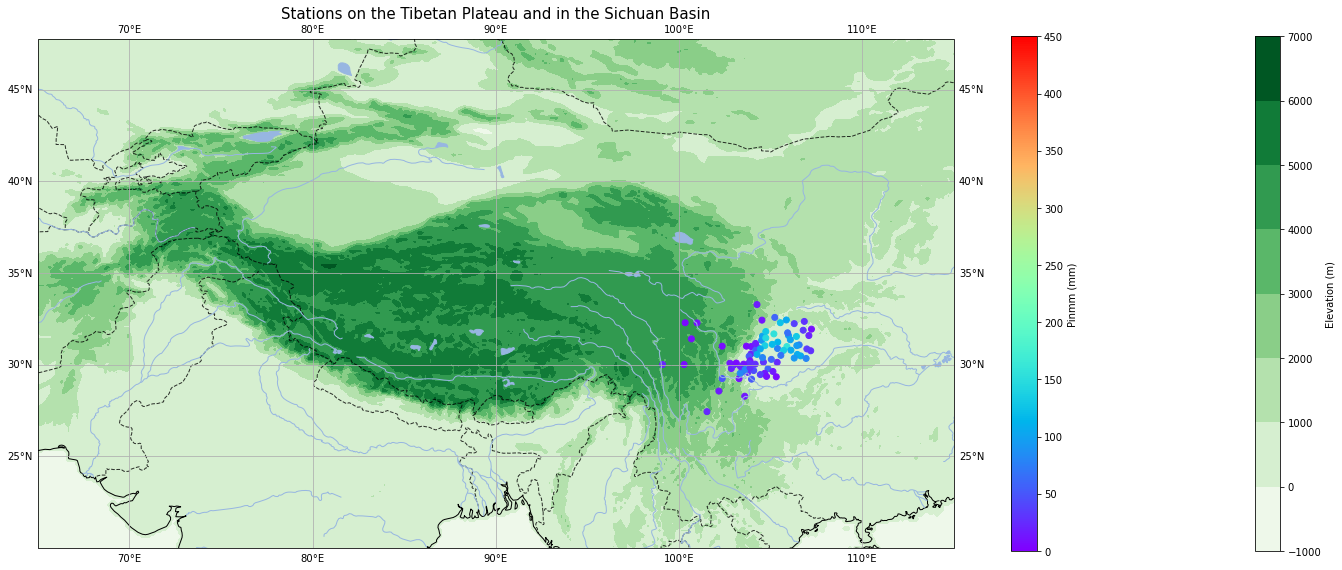

In [170]:
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cf
import cartopy.crs as ccrs

data = Dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')

lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
elevation = data.variables['elevation'][:]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([65,115,20,45])

plt.contourf(lon, lat, elevation, cmap = "Greens")
plt.title('Stations on the Tibetan Plateau and in the Sichuan Basin', fontsize=15)
plt.tight_layout(pad=-50)
bar1 = plt.colorbar(label='Elevation (m)', shrink=0.40)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax.coastlines()
ax.add_feature(cf.BORDERS, alpha=0.8, linestyle='--')
ax.add_feature(cf.RIVERS)
ax.add_feature(cf.LAKES)
ax.gridlines(draw_labels=True)

plt.scatter(x='Longitude', y='Latitude', data=H, c='Pinmm', vmin=0, vmax=450, cmap='rainbow')
bar2 = plt.colorbar(label='Pinmm (mm)', shrink=0.40)

plt.show()